<a href="https://colab.research.google.com/github/ns241098/MSc.-Web-and-Data-Science/blob/main/Assignment7_Causation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pystan
from numpy.core.fromnumeric import size

In [ ]:
n= 500
s= np.random.normal(size=n)     #salary
t= np.random.normal(loc= -s, size=n)   #time
h= np.random.normal(loc= (s-t), size=n)  #happiness

In [ ]:
#stan model

sample_code="""
data{
  int<lower=1> N;
  vector[N] S;
  vector[N] T;
  vector[N] H;

}
parameters{
  real<lower=0> sigma;
  real alpha;
  real bS;
  real bT;
}
model{
  vector[N] mu;
  mu= alpha+ bS*S + bT*T;
  H ~ normal(mu, sigma);
}
"""

In [ ]:
people_data= {
    "N": 500,
    "S": s,
    "T": t,
    "H": h
}

In [ ]:
sm = pystan.StanModel(model_code=sample_code)                      #fit model
fit = sm.sampling(data=people_data, iter=1000, chains=4, seed=1)     

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0fa5fa1e2e1fdcf0ad64a498e55c0bd9 NOW.


In [ ]:
summary_dict = fit.summary()
dfNew = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

dfNew.head()

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
sigma,0.975789,0.000715,0.030627,0.919179,0.954902,0.974024,0.995769,1.037739,1836.224243,0.998958
alpha,0.044306,0.000951,0.043025,-0.041430,0.014712,0.044975,0.073990,0.127272,2048.188442,0.999997
bS,1.043742,0.001993,0.060505,0.924072,1.004370,1.042651,1.085102,1.160178,921.729768,1.008019
bT,-1.011717,0.001433,0.045447,-1.100735,-1.042057,-1.011687,-0.982304,-0.922974,1006.250043,1.007251
lp__,-236.979653,0.051047,1.429980,-240.473187,-237.660189,-236.671075,-235.955997,-235.174183,784.741833,0.999938


Text(0, 0.5, 'Frequency')

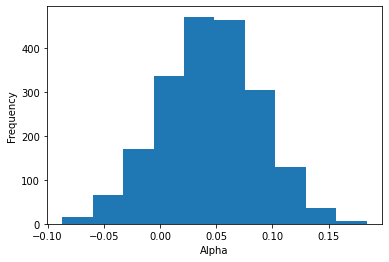

In [ ]:
alpha, betaS, betaT= dfNew['mean']['alpha'], dfNew['mean']['bS'], dfNew['mean']['bT']
betaFitS=fit['bS']
alphaFit= fit['alpha']
betaFitT= fit['bT']

plt.hist(alphaFit)
plt.xlabel('Alpha')
plt.ylabel('Frequency')

(array([  1.,  23.,  72., 234., 473., 525., 431., 179.,  47.,  15.]),
 array([0.81712554, 0.85946411, 0.90180268, 0.94414126, 0.98647983,
        1.0288184 , 1.07115698, 1.11349555, 1.15583412, 1.1981727 ,
        1.24051127]),
 <a list of 10 Patch objects>)

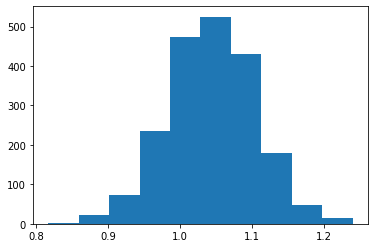

In [ ]:
plt.hist(betaFitS)

(array([ 13.,  60., 203., 399., 549., 461., 217.,  73.,  22.,   3.]),
 array([-1.15456659, -1.12339094, -1.0922153 , -1.06103965, -1.02986401,
        -0.99868836, -0.96751272, -0.93633707, -0.90516143, -0.87398578,
        -0.84281014]),
 <a list of 10 Patch objects>)

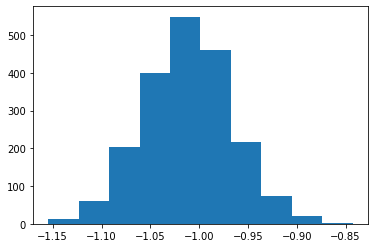

In [ ]:
plt.hist(betaFitT)